In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df=pd.read_csv("data/placement.csv")

In [32]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [35]:
df.shape

(100, 4)

In [36]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [37]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


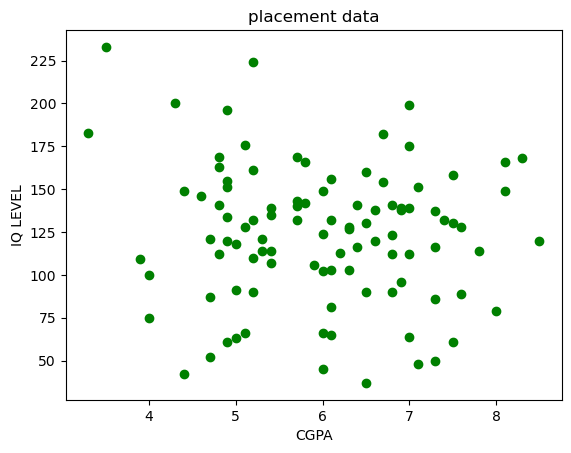

In [75]:
 # scatter points for training data
 # regression line for predictions

plt.title("placement data")
plt.scatter(x=df["cgpa"],y=df["iq"],color="green")
plt.xlabel("CGPA")
plt.ylabel("IQ LEVEL")
                                                                           



plt.show()

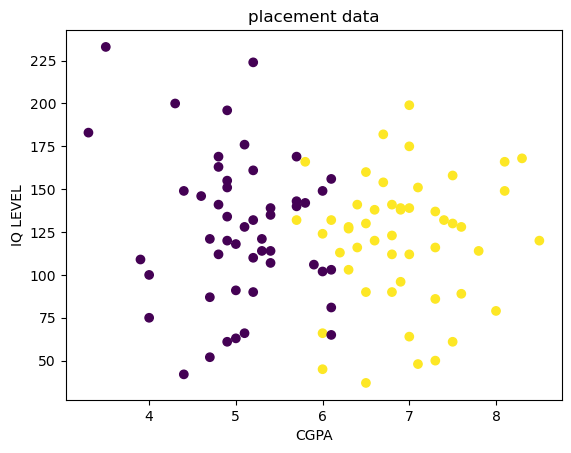

In [76]:
plt.title("placement data")
plt.xlabel("CGPA")
plt.ylabel("IQ LEVEL")

plt.scatter(x=df["cgpa"],y=df["iq"],c=df["placement"])       # scatter points for training data
                                                                            # regression line for predictions

plt.savefig("placement scatter plot")

plt.show()

In [78]:
X = df.drop(columns=["placement"])
y = df["placement"]
y


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [79]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [80]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [81]:
df.placement.value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [84]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=40
)


In [85]:
X_train

,cgpa,iq
72,7.3,116.0
66,6.9,96.0
69,8.5,120.0
67,5.0,118.0
26,7.0,199.0
...,...,...
56,6.1,65.0
37,8.1,149.0
7,5.0,63.0
91,7.5,158.0


In [90]:
y_train

72    1
66    1
69    1
67    0
26    1
     ..
56    0
37    1
7     0
91    1
70    1
Name: placement, Length: 80, dtype: int64

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model =  LogisticRegression()

In [93]:
model

LogisticRegression()

In [95]:
model.fit(X_train,y_train)

LogisticRegression()

In [105]:
y_pred=model.predict(X_test)

In [107]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [106]:
pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

,y_test,y_pred
79,1,1
75,0,0
63,1,1
15,0,0
38,1,1
11,1,1
40,0,0
45,1,0
39,0,0
62,0,0


In [118]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [115]:
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.9


In [116]:
print("Confusion_matrix:",confusion_matrix(y_test,y_pred))

Confusion_matrix: [[12  1]
 [ 1  6]]


In [119]:
print("classification report:",classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.86      0.86      0.86         7

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



In [ ]:
# basically apka model kitna acha ye apki accuracy score nhe  bata ta blky precision bata ti hai 
